# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Задачи работы:
- Научиться определять рыночную стоимость объектов недвижимости на основе данных из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
real_estate = pd.read_csv('./real_estate_data.csv')
real_estate.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


Таблица содержит 23699 строк и 22 столбца, который склеились в один из-за разделителя в виде знака табуляции \t. Исправим это.

In [4]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate.info()
real_estate.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Теперь можно работать с датасетом. 
Первое, что бросается в глаза - всего 2775 non-null значений в столбце is_apartment, 
который к тому же не bool, а object. Здесь придется усердно восполнять пропуски.
Следующие колонки нужно привести к типу int: balcony, floors_total, days_exposition, 
parks_around3000, ponds_around3000.

### Шаг 2. Предобработка данных

В столбце balcony меняем все пропуски на 0, так как если не указали количество балконов, то считаем, что их нет.
Так же приводим тип колонки к int64.

In [5]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)
real_estate['balcony'] = real_estate['balcony'].astype(int)
real_estate['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Теперь видно, что большинство квартир (15277) без балконов.
Заменим пропуски в ceiling_height на медианное значение (2.65)

In [6]:
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].median())
real_estate['ceiling_height'].value_counts()

2.65      9871
2.50      3515
2.60      1646
2.70      1574
3.00      1112
          ... 
3.98         1
4.65         1
5.80         1
4.90         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Пропуски в колонке с общим количеством этажей можно заменить на 1 - предположим, что это одноэтажные частные дома.

In [7]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(1)

Пропуски в living_area и days_exposition заполним медианными значениями.

In [8]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['living_area'].median())
print(real_estate['living_area'].value_counts())

30.00    2501
18.00     882
17.00     675
16.00     486
20.00     481
         ... 
16.04       1
10.55       1
24.83       1
20.03       1
15.55       1
Name: living_area, Length: 1782, dtype: int64


In [9]:
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(real_estate['days_exposition'].median())
print(real_estate['days_exposition'].value_counts())

95.0      3245
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1110.0       1
1135.0       1
951.0        1
693.0        1
773.0        1
Name: days_exposition, Length: 1141, dtype: int64


Заполним пропуски в kitchen_area как разницу между total_area и living_area.

In [10]:
real_estate['kitchen_area'] = real_estate.apply(
    lambda row: row['total_area'] - row['living_area'] if np.isnan(row['kitchen_area']) else row['kitchen_area'],
    axis=1
)
print(real_estate['kitchen_area'].value_counts())

6.00     1330
10.00    1313
8.00     1148
9.00     1142
7.00     1096
         ... 
19.26       1
63.20       1
10.96       1
13.29       1
7.55        1
Name: kitchen_area, Length: 1537, dtype: int64


Для заполнения пропусков в airports_nearest и cityCenters_nearest используем медианные значения
по срезу данных для населенных пунктов.

In [12]:
median_distance = real_estate.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)

print(median_distance)

localities = list(median_distance.index)

def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in localities:
        return median_distance.loc[locality][col]
    
    return row[col]

columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    real_estate.loc[real_estate[column].isnull(), column] = real_estate.apply(fill_missing_data, axis=1, args=(column,))
print(real_estate['cityCenters_nearest'].isna().sum())

                         airports_nearest  cityCenters_nearest
locality_name                                                 
Зеленогорск                       72282.0              53381.0
Колпино                           26232.0              32018.0
Красное Село                      25715.5              29140.5
Кронштадт                         67850.0              49575.0
Ломоносов                         48415.5              51677.0
Павловск                          20529.5              32683.0
Петергоф                          39231.0              33771.0
Пушкин                            15766.0              27930.5
Санкт-Петербург                   26757.5              12244.5
Сестрорецк                        56692.0              34821.0
поселок Лисий Нос                 55930.0              28246.0
поселок Мурино                    51553.0              21888.0
посёлок Александровская           12896.5              27468.0
посёлок Белоостров                57769.0              

Как видно, остались незаполненные данные, это значит, что для некоторых квартир не было информации
по удаленности от центра города и ближайших аэропортов.

In [11]:
real_estate.duplicated().sum()

0

После замены пропусков видим, что дубликатов в данных нет.
Осталось поменять тип данных у колонок floors_total, days_exposition.

In [12]:
for column in ['floors_total', 'days_exposition']:
    real_estate[column] = real_estate[column].astype('int')

### Шаг 3. Посчитайте и добавьте в таблицу

- Цена квадратного метра:

In [13]:
real_estate['square_meter_price'] = real_estate['last_price'] / real_estate['total_area']
real_estate['square_meter_price'].value_counts()

100000.000000    259
83333.333333      64
75000.000000      59
80000.000000      52
125000.000000     51
                ... 
141538.461538      1
124401.913876      1
125000.000000      1
100484.261501      1
62111.801242       1
Name: square_meter_price, Length: 14971, dtype: int64

- День недели, месяц и год публикации объявления

In [14]:
# Преобразуем данные в first_day_exposition, избавимся от времени размещения объявления, оставим только дату
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%d')

real_estate['day_of_exposition'] = real_estate['first_day_exposition'].dt.dayofweek
real_estate['month_of_exposition'] = real_estate['first_day_exposition'].dt.month
real_estate['year_of_exposition'] = real_estate['first_day_exposition'].dt.year

- Этаж квартиры

In [15]:
def group_by_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
real_estate['floor'] = real_estate.apply(group_by_floor, axis=1)
real_estate['floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor, dtype: int64

- Cоотношение жилой и общей площади, а также отношение площади кухни к общей.

In [16]:
real_estate['living_total_areas_ratio'] = real_estate['living_area'] / real_estate['total_area']
real_estate['kitchen_total_areas_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']

real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_exposition,month_of_exposition,year_of_exposition,living_total_areas_ratio,kitchen_total_areas_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,другой,NaN,...,482.0,2.0,755.0,95,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,первый,NaN,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,другой,NaN,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,другой,NaN,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,0.188679,0.811321
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,другой,NaN,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь

In [17]:
real_estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

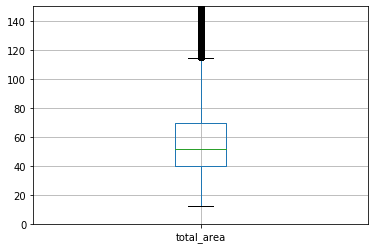

In [18]:
plt.ylim(0, 150)
real_estate.boxplot('total_area')
plt.show()

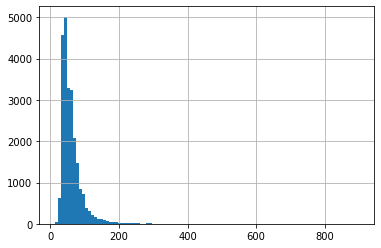

In [19]:
real_estate['total_area'].hist(bins=100)
plt.show()

Средняя площадь - 60 кв. метров. Минимальное значение - 12 кв. метров, а максимальное - 900 кв. метров, что является выбросом.
Нас интересуют значения попадающие в референтный интервал, то есть от 12 до 117 квадратных метров.

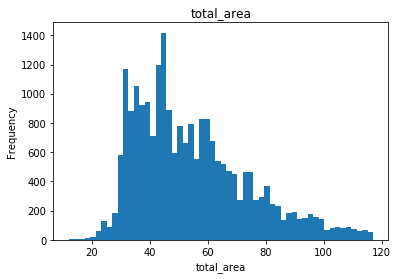

In [20]:
real_estate = real_estate.query('total_area >=12 and total_area <=117')

def hist(column):
    min = real_estate[column].min()
    max = real_estate[column].max()
    plt.hist(real_estate[column], bins='auto', range=(min, max))
    plt.title(column)
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

hist('total_area')

#### Цена

In [21]:
real_estate['last_price'].describe()

count    2.254000e+04
mean     5.340895e+06
std      3.457743e+06
min      1.219000e+04
25%      3.375000e+06
50%      4.500000e+06
75%      6.300000e+06
max      8.200000e+07
Name: last_price, dtype: float64

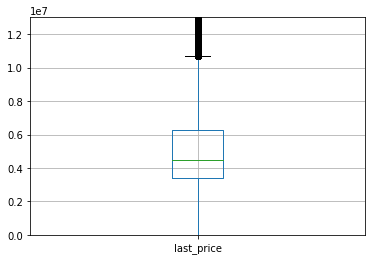

In [22]:
plt.ylim(0, 1.3e+07)
real_estate.boxplot('last_price')
plt.show()

В основном цены на квартиры находятся в диапазоне от 4 млн до 7.2 млн.

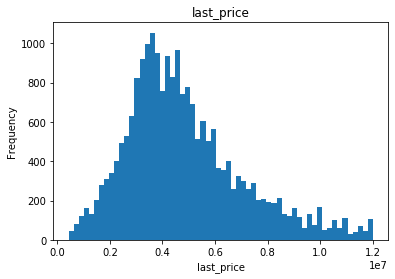

In [23]:
real_estate = real_estate.query('last_price >= 4e+5 and last_price <= 1.2e+7')

hist('last_price')

#### Число комнат

In [24]:
real_estate['rooms'].describe()

count    21585.000000
mean         1.918601
std          0.893152
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

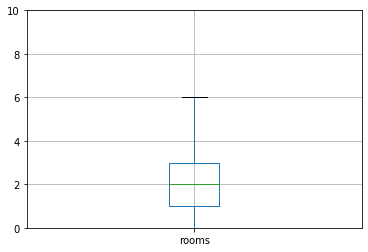

In [25]:
plt.ylim(0, 10)
real_estate.boxplot('rooms')
plt.show()

В основном количество комнат находится в диапазоне от 1 до 3. Среднее значение - 2 комнаты.
Все что выше 6 комнат - выбросы.

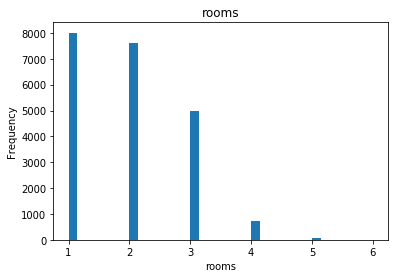

In [26]:
real_estate = real_estate.query('rooms >= 1 and rooms <= 6')

hist('rooms')

#### Высота потолков

In [27]:
real_estate['ceiling_height'].describe()

count    21390.000000
mean         2.696584
std          0.769376
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

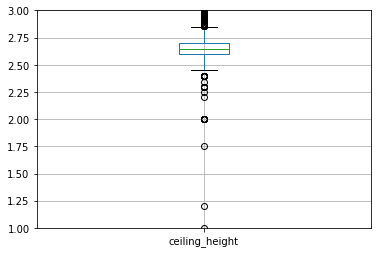

In [28]:
plt.ylim(1, 3)
real_estate.boxplot('ceiling_height')
plt.show()

Основной диапазон значений - от 2.45м до 2.85м. Среднее значение 2.75. Минимальная высота потолка в соответствии с нормами - 2.5м. 
Поэтому значения ниже данного можно не рассматривать.

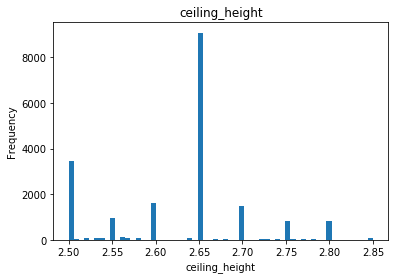

In [29]:
real_estate = real_estate.query('ceiling_height >= 2.5 and ceiling_height <= 2.85')

hist('ceiling_height')


### Время продажи

In [30]:
real_estate['days_exposition'].describe()

mean = real_estate['days_exposition'].mean()
median = real_estate['days_exposition'].median()

print(mean)
print(median)

160.1635249278945
95.0


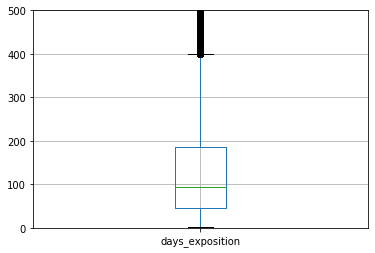

In [31]:
plt.ylim(0, 500)
real_estate.boxplot('days_exposition')
plt.show()

Среднее значение - 169 дней, а медианное - 95.
Основной диапазон значений - от 45 (быстрая продажа) до 199 (долгая продажа) дней.
Нижний хвост - 1 день, верхний - примерно 430 дней.

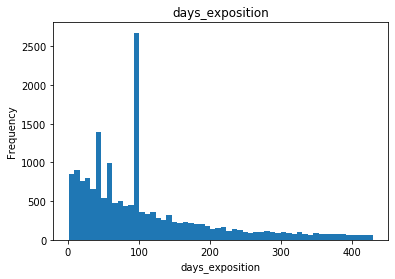

In [32]:
real_estate = real_estate.query('days_exposition >= 1 and days_exposition <= 430')
hist('days_exposition')

### Зависимость стоимости недвижимости от цены квадратного метра

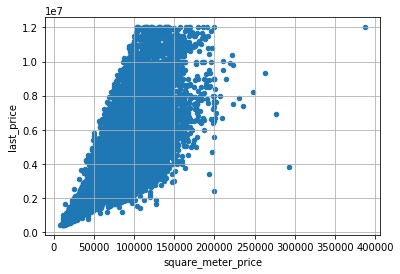

In [33]:
real_estate_filtered = real_estate.query('total_area >= 12 and total_area <= 117 and last_price >= 4e+5 and last_price <= 1.2e+7')

real_estate_filtered.plot(x='square_meter_price', y='last_price', grid=True, kind='scatter')
plt.show()

In [34]:
real_estate_filtered['square_meter_price'].corr(real_estate_filtered['last_price'])

0.6384066462140904

Стоимость недвижимости сильно зависит от цены квадратного метра. Коэффициент корреляции 0.629.

### Зависимость стоимости недвижимости от числа комнат

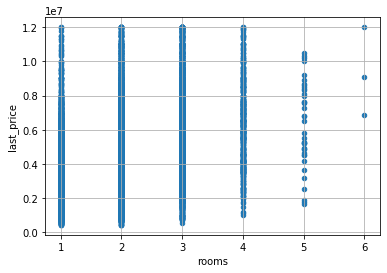

In [35]:
real_estate_filtered = real_estate.query('rooms >= 1 and rooms <= 6 and last_price >= 4e+5 and last_price <= 1.2e+7')

real_estate_filtered.plot(x='rooms', y='last_price', grid=True, kind='scatter')
plt.show()

In [36]:
real_estate_filtered['rooms'].corr(real_estate_filtered['last_price'])

0.4093829021631143

Зависимость стоимости недвижимости от числа комнат весьма слабая.

### Зависимость стоимости недвижимости от удаленности от центра города

In [37]:
real_estate_filtered['cityCenters_nearest'].corr(real_estate_filtered['last_price'])

-0.3074797435655033

Корреляция между стоимостью недвижимости и удаленностью от центра города слабая, а отрицательное значение коэффициента свидетельствует о том, что чем ближе недвижимость к центру города, тем выше цена. 

### Зависимость стоимости недвижимости от этажа

In [38]:
real_estate[['floor', 'last_price']] = real_estate[['floor', 'last_price']].query('last_price >= 4e+5 and last_price <= 1.2e+7')
real_estate[['floor', 'last_price']].pivot_table(index='floor', values='last_price').sort_values(by='last_price', ascending=False)

,last_price
floor,
другой,4.858010e+06
последний,4.141332e+06
первый,3.850952e+06


Чем выше этаж, тем выше и цена за квартиру на этом этаже.

### Зависимость стоимости недвижимости от даты размещения

In [39]:
real_estate_filtered = real_estate.query('days_exposition >= 1 and days_exposition <= 430 and last_price >= 4e+5 and last_price <= 1.2e+7')
real_estate_filtered[['day_of_exposition', 'month_of_exposition', 'year_of_exposition', 'last_price']].corr()

,day_of_exposition,month_of_exposition,year_of_exposition,last_price
day_of_exposition,1.000000,0.011298,-0.012723,-0.006795
month_of_exposition,0.011298,1.000000,-0.305103,0.009057
year_of_exposition,-0.012723,-0.305103,1.000000,0.030217
last_price,-0.006795,0.009057,0.030217,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71f4e07908>,
      dtype=object)

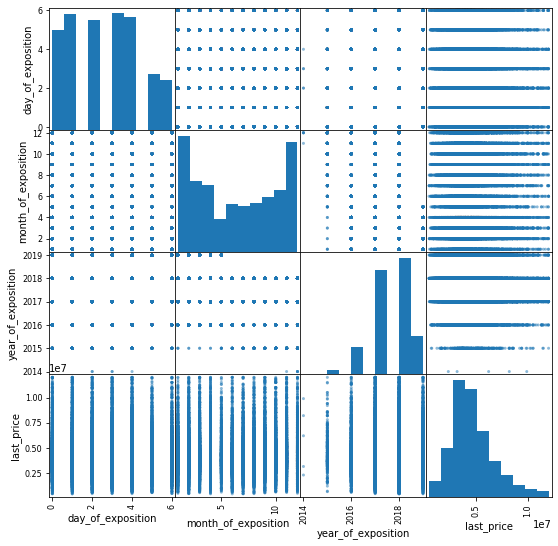

In [41]:
pd.plotting.scatter_matrix(real_estate_filtered[['day_of_exposition', 'month_of_exposition', 'year_of_exposition', 'last_price']], figsize=(9, 9))

Коэффициент корреляции между стоимостью недвижимости и датой размещения объявления близок к нулю, связь отсутствует.

### 10 населённых пунктов с наибольшим числом объявлений

In [42]:
top_ten_localities = real_estate['locality_name'].value_counts().head(10)
top_ten_localities

Санкт-Петербург      10960
посёлок Мурино         450
посёлок Шушары         398
Всеволожск             333
посёлок Парголово      298
Колпино                295
Пушкин                 272
Гатчина                255
деревня Кудрово        245
Выборг                 189
Name: locality_name, dtype: int64

In [43]:
top_ten_locality_names = list(top_ten_localities.index)
(
    real_estate.query('locality_name in @top_ten_locality_names and last_price >= 4e+5 and last_price <= 1.2e+7')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price', ascending=False)
)

,square_meter_price
locality_name,
Санкт-Петербург,104831.326170
Пушкин,99514.809471
деревня Кудрово,92482.731703
посёлок Парголово,90114.773101
посёлок Мурино,85340.089624
посёлок Шушары,78408.041307
Колпино,75287.132729
Гатчина,68404.836431
Всеволожск,67153.222226


Самая низкая цена за квадратный метр в Выборге, а самая дорогая - в Санкт-Петербурге.

### Изучение недвижимости в Санкт-Петербурге.

In [44]:
saint_p_data = real_estate.query('locality_name in "Санкт-Петербург"')
len(saint_p_data)

10960

In [45]:
# Создаём столбец с расстоянием до центра в километрах. Округляем до целых значений.
saint_p_data['cityCenters_nearest_km'] = (saint_p_data['cityCenters_nearest'] / 1000).astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
# Средняя ценя для каждого километра
saint_p_km_price = saint_p_data.pivot_table(index='cityCenters_nearest_km', values='last_price')
print(saint_p_km_price)

                          last_price
cityCenters_nearest_km              
0                       7.339944e+06
1                       8.070887e+06
2                       7.506257e+06
3                       6.994724e+06
4                       7.426053e+06
5                       7.119285e+06
6                       6.834650e+06
7                       6.568587e+06
8                       5.808924e+06
9                       5.170246e+06
10                      5.198678e+06
11                      5.250892e+06
12                      5.405540e+06
13                      5.521407e+06
14                      5.267152e+06
15                      5.117843e+06
16                      5.032682e+06
17                      4.618987e+06
18                      4.772657e+06
19                      4.621305e+06
20                      6.309577e+06
21                      5.087356e+06
22                      5.137987e+06
23                      4.256087e+06
24                      3.862235e+06
2

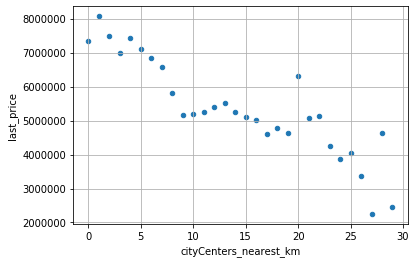

In [50]:
# График зависимости цены от удаленности недвижимости от центра
(
    pd.DataFrame(saint_p_km_price.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True)
)
plt.show()

График сильно меняется в районе 8км. Примем это значение за центральную зону.

### Проанализируйте сегмент квартир в центре

In [51]:
# Выборка квартир в центре
saint_p_estate = pd.DataFrame(saint_p_data.query('cityCenters_nearest_km <= 8'))

In [52]:
# Площадь
saint_p_estate['total_area'].describe()

count    1587.000000
mean       58.788475
std        20.302047
min        12.000000
25%        43.000000
50%        56.400000
75%        72.000000
max       117.000000
Name: total_area, dtype: float64

In [53]:
# Цена
saint_p_estate['last_price'].describe()

count    1.587000e+03
mean     6.800674e+06
std      2.335212e+06
min      1.686000e+06
25%      4.990000e+06
50%      6.550000e+06
75%      8.500000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [54]:
# Число комнат
saint_p_estate['rooms'].describe()

count    1587.000000
mean        2.061752
std         0.892715
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [55]:
# Высота потолков
saint_p_estate['ceiling_height'].describe()

count    1587.000000
mean        2.652773
std         0.078891
min         2.500000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64

Рассмотрим квартиру из среднестатистического объявления:

Площадь - 63 квадратных метра.
Цена - 7.2 млн.
Число комнат - 2 комнаты.
Высота потолков - 2.65 м.

### Выделим факторы, влияющие на стоимость квартиры

In [56]:
saint_p_data = saint_p_estate

columns = [
    'last_price',
    'total_area',
    'rooms',
    'ceiling_height',
    'day_of_exposition',
    'month_of_exposition',
    'year_of_exposition',
    'cityCenters_nearest_km'
]

saint_p_data[columns].corr().sort_values('last_price', ascending=False)

,last_price,total_area,rooms,ceiling_height,day_of_exposition,month_of_exposition,year_of_exposition,cityCenters_nearest_km
last_price,1.000000,0.748100,0.457996,0.270644,0.036694,0.016570,0.012584,-0.240970
total_area,0.748100,1.000000,0.790296,0.194042,0.022930,0.040997,-0.104992,-0.235546
rooms,0.457996,0.790296,1.000000,0.049135,0.007352,0.032691,-0.076268,-0.198178
ceiling_height,0.270644,0.194042,0.049135,1.000000,0.001282,0.002096,-0.042924,-0.186875
day_of_exposition,0.036694,0.022930,0.007352,0.001282,1.000000,0.049336,-0.003823,0.001924
month_of_exposition,0.016570,0.040997,0.032691,0.002096,0.049336,1.000000,-0.300714,-0.003021
year_of_exposition,0.012584,-0.104992,-0.076268,-0.042924,-0.003823,-0.300714,1.000000,0.120668
cityCenters_nearest_km,-0.240970,-0.235546,-0.198178,-0.186875,0.001924,-0.003021,0.120668,1.000000


In [57]:
real_estate['cityCenters_nearest_km'] = (real_estate['cityCenters_nearest'] / 1000)
real_estate_data = real_estate

columns = [
    'last_price',
    'total_area',
    'rooms',
    'ceiling_height',
    'day_of_exposition',
    'month_of_exposition',
    'year_of_exposition',
    'cityCenters_nearest_km'
]

real_estate[columns].corr().sort_values('last_price', ascending=False)


,last_price,total_area,rooms,ceiling_height,day_of_exposition,month_of_exposition,year_of_exposition,cityCenters_nearest_km
last_price,1.000000,0.680565,0.409383,0.246750,-0.006795,0.009057,0.030217,-0.307480
total_area,0.680565,1.000000,0.797569,0.138092,-0.000926,0.015548,-0.039349,-0.072823
rooms,0.409383,0.797569,1.000000,-0.094665,0.004166,0.001411,-0.016080,-0.034272
ceiling_height,0.246750,0.138092,-0.094665,1.000000,0.007455,0.013256,-0.107403,-0.097977
year_of_exposition,0.030217,-0.039349,-0.016080,-0.107403,-0.012723,-0.305103,1.000000,0.005200
month_of_exposition,0.009057,0.015548,0.001411,0.013256,0.011298,1.000000,-0.305103,-0.013579
day_of_exposition,-0.006795,-0.000926,0.004166,0.007455,1.000000,0.011298,-0.012723,-0.001176
cityCenters_nearest_km,-0.307480,-0.072823,-0.034272,-0.097977,-0.001176,-0.013579,0.005200,1.000000


In [58]:
# Этаж
#saint_p_data.pivot_table(index='floor', values='last_price').sort_values(by='last_price')
print(saint_p_data.pivot_table(index='floor', values='last_price').sort_values(by='last_price'))

             last_price
floor                  
первый     5.642075e+06
последний  6.731731e+06
другой     7.007359e+06


Средняя цена в центре 7.2 млн, а по всему Петербургу - 6.4 млн. Остальные коэффициенты корреляции похожи для центра и области.
Зависимость цены от этажа такая же - на первом этаже самые дешевые квартиры, а самые дорогие квартиры - между первым и последним этажами.

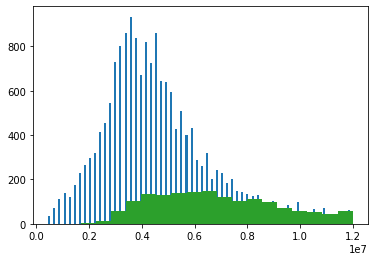

In [60]:
plt.hist([real_estate_data['last_price'],saint_p_data['last_price']], bins = 'auto', label=['x', 'y'])
plt.hist(saint_p_data['last_price'], bins = 'auto', label=['x', 'y'])
plt.show()

характерно что стоимость квартиры в конечной выборки в Санкт-Петербурге более смещена влево, без сильный выбросов на графике. Средняя стоимость сильно выше чем в общей выборке.

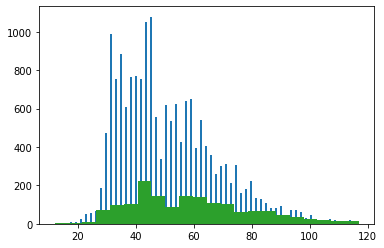

In [61]:
plt.hist([real_estate_data['total_area'],saint_p_data['total_area']], bins = 'auto', label=['x', 'y'])
plt.hist(saint_p_data['total_area'], bins = 'auto', label=['x', 'y'])
plt.show()

Средняя площадь при этом не сильно отличается.

Количество комнат - логически не самый хороший показатель, даже с учетом корреляция 0.4 т.к это зависимый параметр от более общего total_area

### Шаг 5. Общий вывод

Чем ближе недвижимость к центру города, тем она дороже. Однако в пределах центра стоимость отличается незначительно.
Факторы, влияющие на стоимость: общая площадь, этаж, кол-во комнат, высота потолков.
Первые и последние этажи дешевле чем центральные. Среднее значение продажи квартиры - 169 дней, а медианное - 95.

В пределах 8! км от центра - самые дорогие квартиры, этот вывод пожалуй самый главный для меня. Это наверное тема отдельного исследования, но теоретически можно было бы парсить авито,яндекс недвижимость и искать неодоцененные квартиры для покупки, но это так, лучше заняться когда буду уметь работать с Машин лернинг, т.к показателей оевидно больше чем только это


In [68]:
#saint_p_data['total_area'].describe()
#real_estate_data['total_area'].describe()

#saint_p_data['last_price'].describe()
#real_estate_data['last_price'].describe()

count    1.587000e+03
mean     6.800674e+06
std      2.335212e+06
min      1.686000e+06
25%      4.990000e+06
50%      6.550000e+06
75%      8.500000e+06
max      1.200000e+07
Name: last_price, dtype: float64


- Средняя площадь от 50-60 метров, независомо от города.
- Цена на квартиры заметно выше в Питере, 6.8 против 5 млн
- Число комнат не зависит от города
- Высота потолков не зависит от города

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод